***Importing Libraries..***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

***Loading the Dataset..***

In [3]:
data = pd.read_csv('/content/telecom_churn.csv')
data.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


***Data Cleaning And Preprocessing..***

In [4]:
print(data.isnull().sum())

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [7]:
print(data.dtypes)

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object


***Exploratory Data Analysis..***

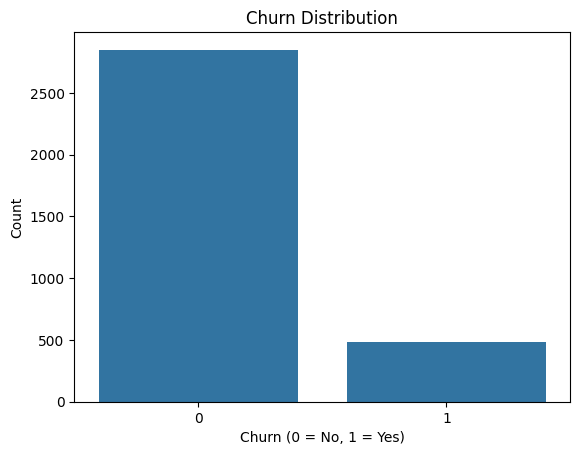

In [8]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


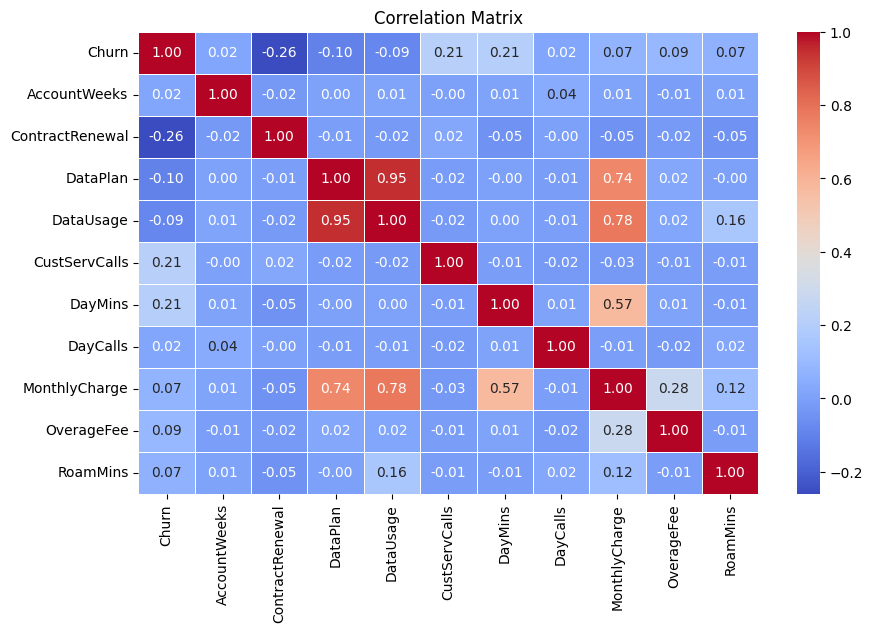

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

***Feature Engineering..***

In [10]:
X = data.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = data['Churn']  # Target variable (Churn)


***Splitting the Data..***

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

***Preprocessing and Model Selection..***

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

***Model Evaluation..***

In [14]:
y_rf_pred = rf_model.predict(X_test)

In [15]:
print("\nRandom Forest Model Evaluation:")
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Accuracy:", rf_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_rf_pred))


Random Forest Model Evaluation:
Accuracy: 0.9265367316341829

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667

Confusion Matrix:
 [[556  10]
 [ 39  62]]
ROC AUC Score: 0.7980967708078228


***Preprocessing and Model Selection 2nd..***

In [16]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

***Model Evaluation..***

In [17]:
y_lr_pred = lr_model.predict(X_test)

In [18]:
print("\nLogistic Regression Model Evaluation:")
lr_accuracy = accuracy_score(y_test, y_lr_pred)
print("Accuracy:", lr_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_lr_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_lr_pred))


Logistic Regression Model Evaluation:
Accuracy: 0.8590704647676162

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Confusion Matrix:
 [[555  11]
 [ 83  18]]
ROC AUC Score: 0.5793915964034565


***Comparing the Accuracies of both Models..***

<ipython-input-19-237cf5c4e229>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


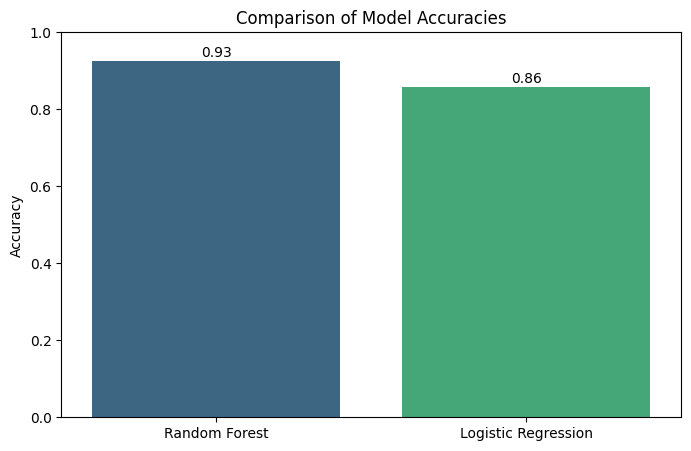


Comparison of Model Accuracies:
Random Forest Accuracy: 0.9265
Logistic Regression Accuracy: 0.8591



In [19]:
plt.figure(figsize=(8, 5))
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]

sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')  # Add text labels on top of the bars
plt.show()

print("\nComparison of Model Accuracies:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}\n")

***Implementation In Real World***

In [21]:
import joblib

In [22]:
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [23]:
loaded_model = joblib.load('random_forest_model.pkl')

In [24]:
def predict_churn(input_data):
    # Scale the input data
    input_scaled = scaler.transform([input_data])  # Ensure input data is in the correct shape
    prediction = loaded_model.predict(input_scaled)
    return prediction[0]

In [25]:
example_input = [120, 1, 1, 2.5, 3, 200.5, 100, 70.5, 10.5, 5.2]

In [26]:
prediction = predict_churn(example_input)
print(f'Churn Prediction for the input data: {prediction}')

Churn Prediction for the input data: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
